# Chart: Checking A/B Tests Early Can Lead to Premature Conclusions


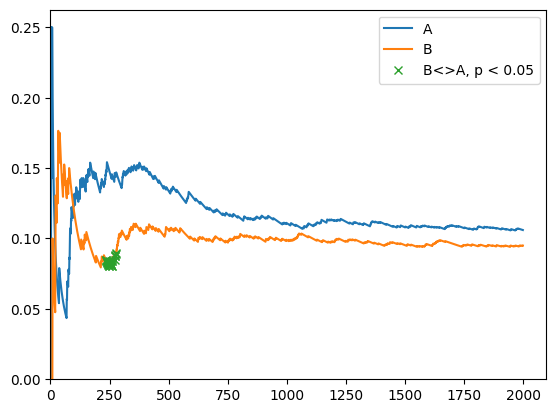

In [ ]:
import random

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

random.seed(704003)

p = 0.1

y1s = []
y2s = []
while len(y1s) < 2000:
    y1s.append(random.random() < p)
    y2s.append(random.random() < p)

y1s = np.cumsum(y1s)
y2s = np.cumsum(y2s)

z1s = y1s / np.arange(1, len(y1s) + 1)
z2s = y2s / np.arange(1, len(y2s) + 1)

def check_significance(i, y1, y2):
    trials = i + 1
    obs = [[y1, trials - y1],
           [y2, trials - y2]]
    obs = np.array(obs)

    if obs.min() < 5:
        # considered too small for chi squared
        return False

    res = chi2_contingency(obs)
    return res.pvalue < 0.05

foo = [(i, z2s[i]) for (i, (y1, y2)) in enumerate(zip(y1s, y2s)) if check_significance(i, y1, y2)]
(x3s, z3s) = zip(*foo)

plt.plot(z1s, label="A")
plt.plot(z2s, label="B")
plt.plot(x3s, z3s, label="B<>A, p < 0.05", linestyle="none", marker="x")
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.show();